In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

### Data Collection

In [ ]:
data = pd.read_csv("/content/forest_fire_dataset.csv")

In [ ]:
data

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36006,-28.0656,131.6334,312.7,1.2,1.1,9/30/2019,1644,Aqua,MODIS,85,6.3,292.9,14.2,N,0
36007,-28.2625,128.5494,304.9,1.0,1.0,9/30/2019,1644,Aqua,MODIS,27,6.3,290.9,6.4,N,0
36008,-28.2941,128.5123,301.7,1.0,1.0,9/30/2019,1644,Aqua,MODIS,43,6.3,290.4,5.5,N,0
36009,-28.3001,128.5530,303.6,1.0,1.0,9/30/2019,1644,Aqua,MODIS,41,6.3,290.3,5.7,N,0


In [ ]:
data.shape

(36011, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    36011 non-null  float64
 1   longitude   36011 non-null  float64
 2   brightness  36011 non-null  float64
 3   scan        36011 non-null  float64
 4   track       36011 non-null  float64
 5   acq_date    36011 non-null  object 
 6   acq_time    36011 non-null  int64  
 7   satellite   36011 non-null  object 
 8   instrument  36011 non-null  object 
 9   confidence  36011 non-null  int64  
 10  version     36011 non-null  float64
 11  bright_t31  36011 non-null  float64
 12  frp         36011 non-null  float64
 13  daynight    36011 non-null  object 
 14  type        36011 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 4.1+ MB


In [ ]:
data.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


In [ ]:
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

## Data Preprocessing

In [ ]:
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [ ]:
data.instrument.value_counts()

MODIS    36011
Name: instrument, dtype: int64

In [ ]:
data.version.value_counts()

6.3    36011
Name: version, dtype: int64

In [ ]:
data.daynight.value_counts()

D    28203
N     7808
Name: daynight, dtype: int64

In [ ]:
data.track.value_counts()

1.0    12198
1.1     7443
1.2     4442
1.3     3378
1.4     2321
1.5     1764
1.6     1589
1.7     1023
1.8      832
1.9      601
2.0      420
Name: track, dtype: int64

In [ ]:
data.satellite.value_counts()

Aqua     20541
Terra    15470
Name: satellite, dtype: int64

In [ ]:
# since "instrument" and "version" column are static, we will drop them
data = data.drop(['instrument', 'version'], axis = 1)

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,Terra,36,298.8,27.6,D,0


In [ ]:
# transforming binary data columns into numbers
# 1 for "D" and 0 for "N"
# 1 for "Terra satellite" and 0 for "Aqua satellite"
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

data['daynight'] = data['daynight'].map(daynight_map)
data['satellite'] = data['satellite'].map(satellite_map)

In [ ]:
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,1,36,298.8,27.6,1,0


In [ ]:
data.type.value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [ ]:
# creating dummies for "type" column and renaming the new formed columns
types = pd.get_dummies(data['type'])
data = pd.concat([data, types], axis=1)
data = data.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [ ]:
data = data.drop(['type'], axis = 1)
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3
0,-11.8070,142.0583,313.0,1.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,1.0,8/1/2019,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,1.7,8/1/2019,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,1.9,8/1/2019,57,1,36,298.8,27.6,1,1,0,0


In [ ]:
data.scan.describe()

count    36011.000000
mean         1.620905
std          0.813764
min          1.000000
25%          1.100000
50%          1.300000
75%          1.900000
max          4.800000
Name: scan, dtype: float64

In [ ]:
# create bins for "scan" column
bins = [0, 1, 2, 3, 4, 5]
labels = [1, 2, 3, 4, 5]
data['scan_bins'] = pd.cut(data['scan'], bins=bins, labels=labels)

In [ ]:
data.scan_bins.value_counts()

2    20218
1     8284
3     4747
4     1844
5      918
Name: scan_bins, dtype: int64

In [ ]:
# since we do not need "scan" column we can drop it
data = data.drop('scan', axis = 1)

In [ ]:
data.head()

,latitude,longitude,brightness,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_bins
0,-11.8070,142.0583,313.0,1.0,8/1/2019,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,8/1/2019,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,1.7,8/1/2019,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,8/1/2019,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,1.9,8/1/2019,57,1,36,298.8,27.6,1,1,0,0,4


In [ ]:
# converting "acq_date" column from object datatype to datetime
data['acq_date'] = pd.to_datetime(data['acq_date'])

In [ ]:
# seperating date, month and year from the "acq_date" column
data['date'] = data['acq_date'].dt.day
data['month'] = data['acq_date'].dt.month
data['year'] = data['acq_date'].dt.year
data.head()

,latitude,longitude,brightness,track,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_bins,date,month,year
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,1,8,2019
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,1,8,2019
2,-12.8398,132.8744,311.6,1.7,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,1,8,2019
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,1,8,2019
4,-12.4953,131.4897,310.3,1.9,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,1,8,2019


## Features selection

In [ ]:
X = data[['latitude', 'longitude', 'brightness', 'satellite', 'frp', 'daynight', 'type_2', 'type_3', 'scan_bins', 'date', 'month', 'year']]
y = data["confidence"]

In [ ]:
X.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_bins,date,month,year
0,-11.8070,142.0583,313.0,1,6.6,1,0,0,1,1,8,2019
1,-11.7924,142.0850,319.3,1,11.3,1,0,0,1,1,8,2019
2,-12.8398,132.8744,311.6,1,23.1,1,0,0,4,1,8,2019
3,-14.4306,143.3035,310.1,1,6.5,1,0,0,2,1,8,2019
4,-12.4953,131.4897,310.3,1,27.6,1,0,0,4,1,8,2019


In [ ]:
y.head()

0    48
1    71
2    42
3    33
4    36
Name: confidence, dtype: int64

## Training and validation set split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28808, 12), (7203, 12), (28808,), (7203,))

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
correlation = X_train.corr()
correlation

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,date,month,year
latitude,1.000000,-0.583460,0.142619,0.023406,-0.011912,0.071509,-0.084973,0.002919,0.035230,-0.119310,NaN
longitude,-0.583460,1.000000,-0.105081,-0.030340,0.001284,-0.096467,0.004688,0.001202,-0.039162,0.155059,NaN
brightness,0.142619,-0.105081,1.000000,-0.174402,0.657844,0.394584,-0.060186,0.019037,0.048042,0.149692,NaN
satellite,0.023406,-0.030340,-0.174402,1.000000,-0.082995,-0.194625,0.024363,0.002645,-0.010517,-0.023489,NaN
frp,-0.011912,0.001284,0.657844,-0.082995,1.000000,0.108184,-0.027400,0.002756,0.009211,0.097488,NaN
daynight,0.071509,-0.096467,0.394584,-0.194625,0.108184,1.000000,-0.006527,-0.008333,0.041833,-0.063487,NaN
type_2,-0.084973,0.004688,-0.060186,0.024363,-0.027400,-0.006527,1.000000,-0.001816,0.012313,-0.006734,NaN
type_3,0.002919,0.001202,0.019037,0.002645,0.002756,-0.008333,-0.001816,1.000000,0.004108,-0.001771,NaN
date,0.035230,-0.039162,0.048042,-0.010517,0.009211,0.041833,0.012313,0.004108,1.000000,-0.107900,NaN
month,-0.119310,0.155059,0.149692,-0.023489,0.097488,-0.063487,-0.006734,-0.001771,-0.107900,1.000000,NaN


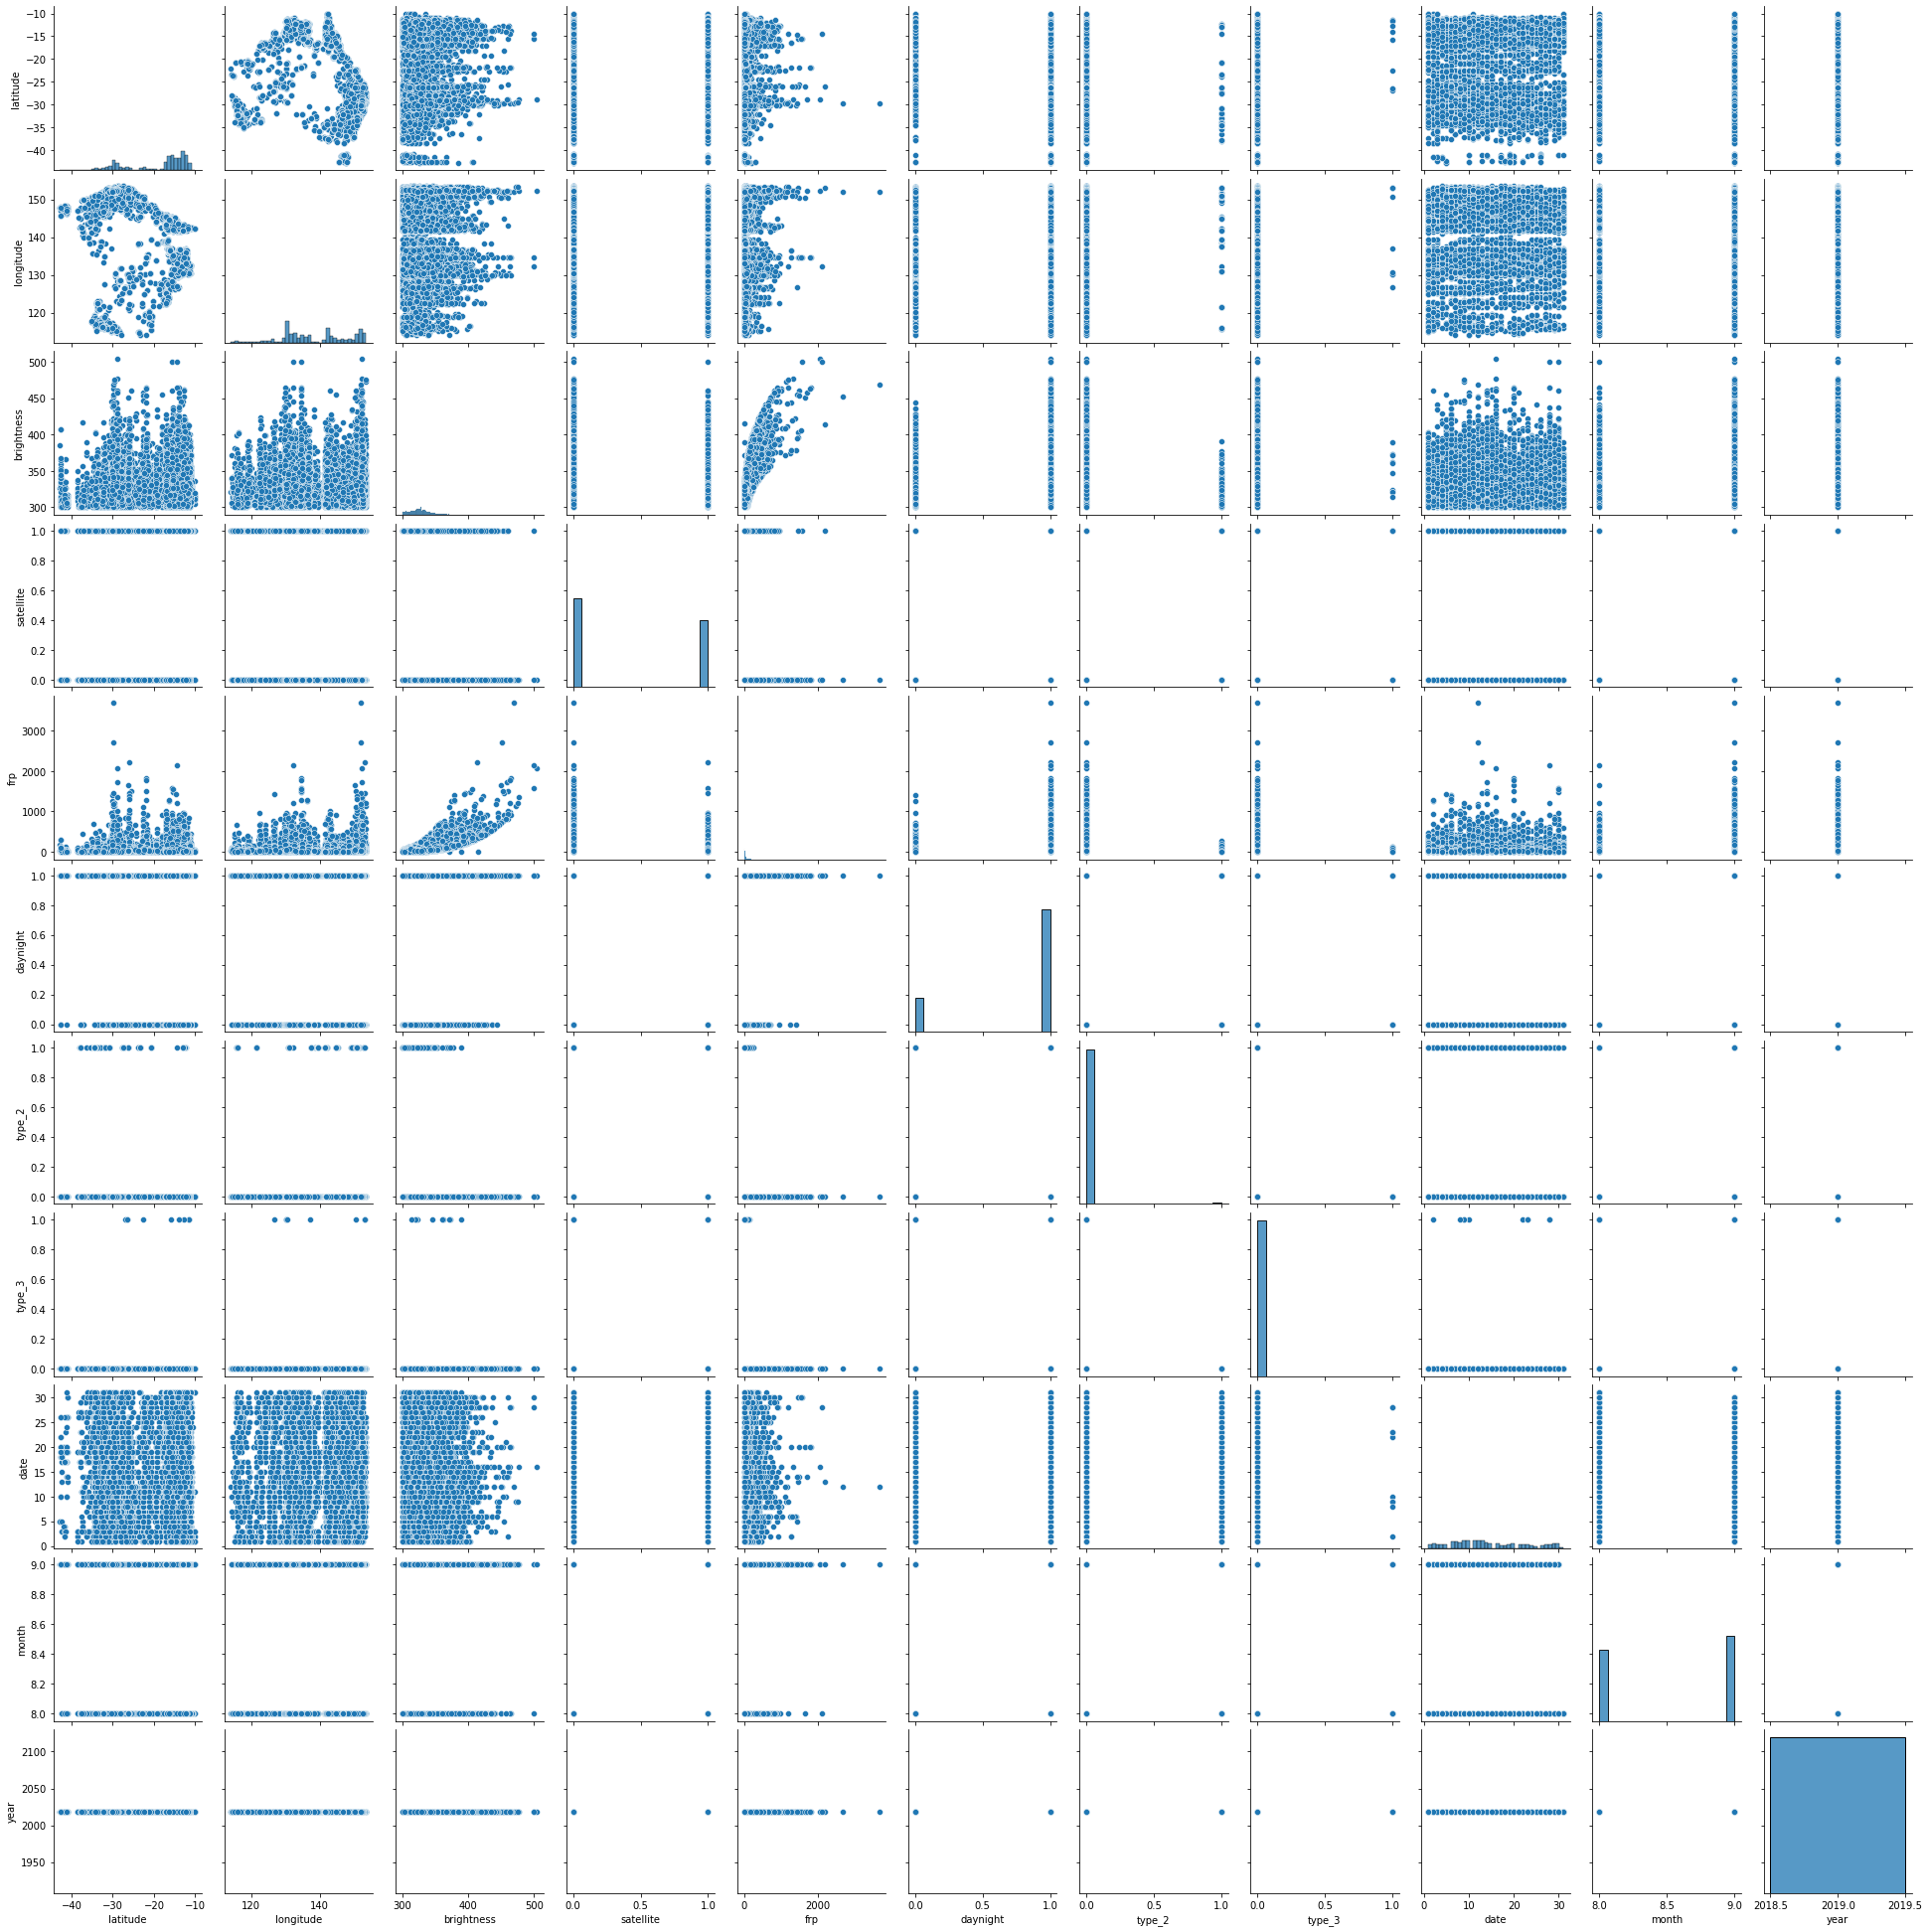

In [ ]:
sns.pairplot(X_train)

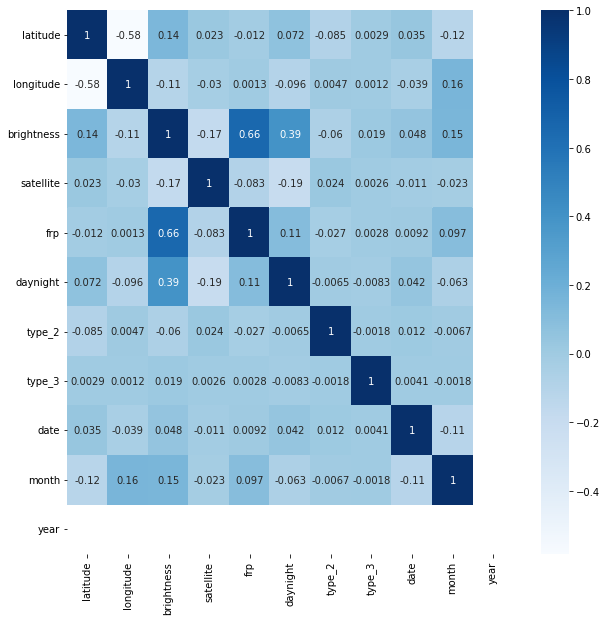

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap='Blues')

### Analysis on categorical data

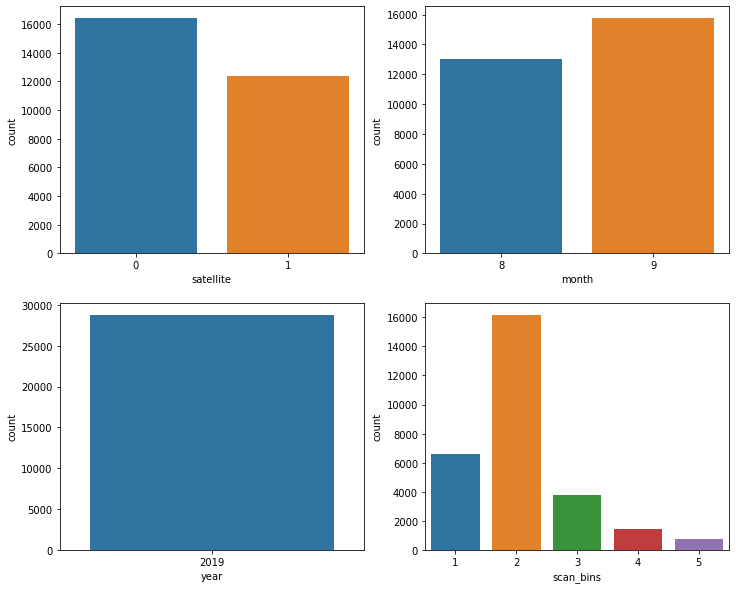

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,10
figure,ax = plt.subplots(2,2)

plt.subplot(2,2,1)
sns.countplot(X_train['satellite'])

plt.subplot(2,2,2)
sns.countplot(X_train['month'])

plt.subplot(2,2,3)
sns.countplot(X_train['year'])

plt.subplot(2,2,4)
sns.countplot(X_train['scan_bins'])

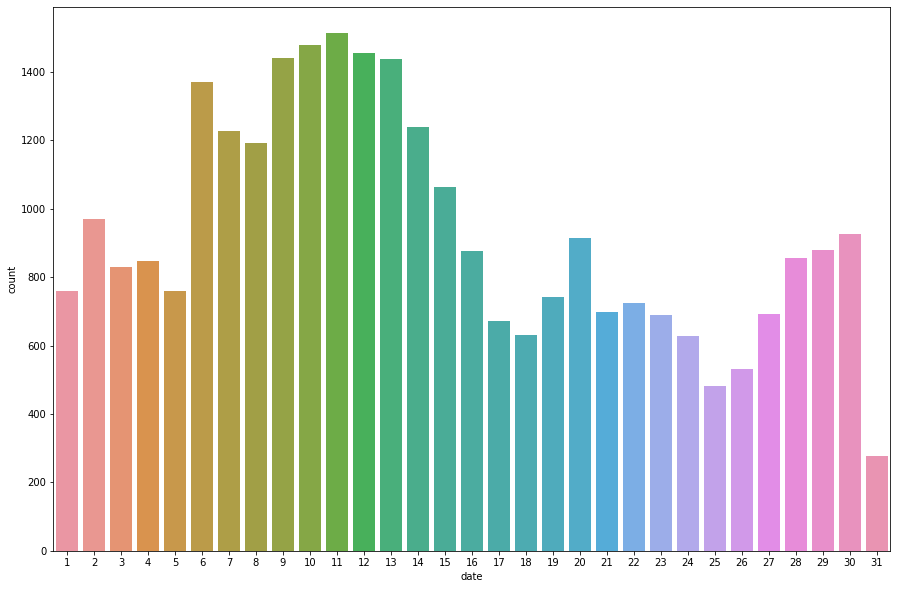

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = X_train['date'])

In [ ]:
# since data is only for the year 2019, we can drop it from both X_train and X_val
X_train = X_train.drop(['year'], axis = 1)
X_val = X_val.drop(['year'], axis = 1)

### Analysis on numerical data

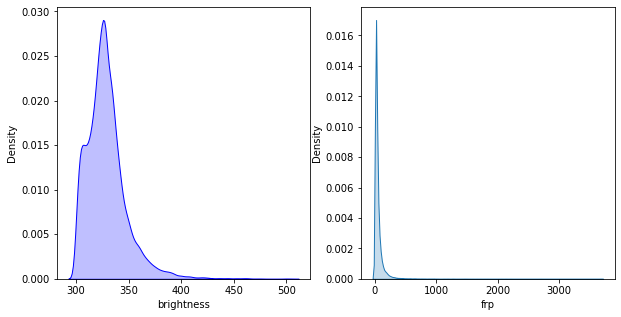

In [ ]:
rcParams['figure.figsize'] = 10,5
figure,ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.kdeplot(X_train['brightness'],color='b',shade='True')

plt.subplot(1,2,2)
sns.kdeplot(X_train['frp'],shade='True')

## Modeling and Accuracy on training vs Validation

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_val)

In [ ]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[308.8848251049806],[0.43820701774845305],

### Logistic Regression Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
Algorithm.append('LogisticRegression')
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_val)

In [ ]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LogisticRegression'],[308.8848251049806, 824.3544356518117],[0.43820701774845305, -0.4993178660677908],

### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRregression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_val)

In [ ]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LogisticRegression', 'SupportVectorRregression'],[308.8848251049806, 824.3544356518117, 327.9469901167373],[0.43820701774845305, -0.4993178660677908, 0.40353716782466276],

### Extreme Gradient Boosting

In [ ]:
X_train['scan_bins'].replace([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], inplace=True)
X_val['scan_bins'].replace([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], inplace=True)

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_val)

[06:27:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LogisticRegression', 'SupportVectorRregression', 'XGB Regressor'],[308.8848251049806, 824.3544356518117, 327.9469901167373, 207.59602761771262],[0.43820701774845305, -0.4993178660677908, 0.40353716782466276, 0.6224288732238897],

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,308.884825,0.438207
1,LogisticRegression,824.354436,-0.499318
2,SupportVectorRregression,327.946990,0.403537
3,XGB Regressor,207.596028,0.622429


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

ANN

In [ ]:
model=Sequential()
model.add(Dense(5, input_dim=11, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 60        
                                                                 
 dropout_11 (Dropout)        (None, 5)                 0         
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dropout_12 (Dropout)        (None, 5)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 10, epochs = 100)

Epoch 1/100
2881/2881 [==============================] - 7s 2ms/step - loss: -203201488.0000 - accuracy: 3.4713e-05 - val_loss: -328528608.0000 - val_accuracy: 4.1649e-04
Epoch 2/100
2881/2881 [==============================] - 8s 3ms/step - loss: -535318336.0000 - accuracy: 3.4713e-05 - val_loss: -773586560.0000 - val_accuracy: 4.1649e-04
Epoch 3/100
2881/2881 [==============================] - 8s 3ms/step - loss: -1115170560.0000 - accuracy: 3.4713e-05 - val_loss: -1481695872.0000 - val_accuracy: 4.1649e-04
Epoch 4/100
2881/2881 [==============================] - 8s 3ms/step - loss: -1979773952.0000 - accuracy: 3.4713e-05 - val_loss: -2505055488.0000 - val_accuracy: 4.1649e-04
Epoch 5/100
2881/2881 [==============================] - 8s 3ms/step - loss: -3181304064.0000 - accuracy: 3.4713e-05 - val_loss: -3894111488.0000 - val_accuracy: 4.1649e-04
Epoch 6/100
2881/2881 [==============================] - 8s 3ms/step - loss: -4735694848.0000 - accuracy: 3.4713e-05 - val_loss: -568801587